![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-bear-100-Molprop.png)
## Molecular representation benchmarks - MolProp250K

## Background

Molecular representations are crucial for understanding molecular structure, predicting properties, QSAR studies, toxicology and chemical modeling and other aspects in drug discovery tasks. Therefore, benchmarks for molecular representations are critical tools that drive progress in the field of computational chemistry and drug design. In recent years, many large models have been trained for learning molecular representation. The aim is to evaluate if large pretrained models are capable of predicting various “easy-to-compute” molecular properties. 


## Benchmarking 

The objective is to comprehend the proficiency of a model in predicting these 'easy' properties, gauging its effectiveness. Ideally, any pre-trained models should, at the very least, demonstrate good performance in those tasks before applying them to the downstream tasks. 

## Description of readout
 The computed properties are molecular weight, fraction of sp3 carbon atoms (fsp3), number of rotatable bonds, topological polar surface area, computed logP, formal charge, number of charged atoms, refractivity and number of aromatic rings. These properties are widely used in molecule design and molecule prioritization.

## Data resource
**Reference**: https://pubs.acs.org/doi/10.1021/acs.jcim.5b00559 

**Raw data**: https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_randm_zinc_drugs_clean_3.csv \

## Train/test split
The objective is to comprehend the proficiency of a model in predicting these 'easy' properties. In order to select the predictive models which is able to generalize to new chemical space, a scaffold split is used to generate train/test sets. 

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pathlib

import datamol as dm

# polaris benchmark
from polaris.benchmark import MultiTaskBenchmarkSpecification

# polaris hub
from polaris.utils.types import HubOwner

# utils
root = pathlib.Path("__file__").absolute().parents[3]
os.chdir(root)
sys.path.insert(0, str(root))
from utils.docs_utils import load_readme

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Get the owner and organization
org = "polaris"
data_name = "molprop"
dataset_name = 'molprop-250k-v2'
dirname = dm.fs.join(root, f"org-{org}", data_name)
gcp_root = f"gs://polaris-public/polaris-recipes/org-{org}/{data_name}"



owner = HubOwner(slug=org, type="organization")
owner

HubOwner(slug='polaris', external_id=None, type='organization')

In [11]:
BENCHMARK_DIR = f"{gcp_root}/benchmarks"
DATASET_JSON = f"{gcp_root}/datasets/{dataset_name}/dataset.json"
'gs://polaris-public/polaris-recipes/org-polaris/molprop/datasets/molprop-250k-v2/dataset.json'
FIGURE_DIR =  f"{gcp_root}/figures"

###  Load the exsting `Dataset` object

In [13]:
# Load the saved Dataset
from polaris.dataset import Dataset

dataset = Dataset.from_json('gs://polaris-public/polaris-recipes/org-polaris/molprop/datasets/molprop-250k-v2/dataset.json'
)

In [14]:
dataset

{
  "name": "molprop-250k-v2",
  "description": " Molecule properties computed for ZINC15 250K dataset. Those molecular properties are used to examinate the usefullness of any pretrained models. Especially, any model for generation purpose should not fail on these tasks.",
  "tags": [
    "Representation",
    "Molecular Properties"
  ],
  "user_attributes": {
    "year": "2015"
  },
  "owner": "polaris",
  "polaris_version": "dev",
  "default_adapters": {},
  "zarr_root_path": null,
  "md5sum": "e9563cb1a3633f0b2196e3e92f1c9fbc",
  "readme": "\n![molprop](https://storage.googleapis.com/polaris-public/icons/icons8-bear-100-Molprop.png)\n\n## Background\n\nMolecular representations are crucial for understanding molecular structure, predicting properties, QSAR studies, toxicology and chemical modeling and other aspects in drug discovery tasks. Therefore, benchmarks for molecular representations are critical tools that drive progress in the field of computational chemistry and drug design. In recent years, many large models have been trained for learning molecular representation. The aim is to evaluate large pretrained models are capable of predicting various \u201ceasy-to-compute\u201d molecular properties. \n\n## Description of readout\nThe computed properties are molecular weight, fraction of sp3 carbon atoms (fsp3), number of rotatable bonds, topological polar surface area, computed logP, formal charge, number of charged atoms, refractivity and number of aromatic rings. These properties are widely used in molecule design and molecule prioritization.\n\n**Number of molecules after curation**: 249455\n\n## Data resource\nZINC is a widely utilized public access database and tool set, playing a crucial role in various applications including virtual screening, ligand discovery, pharmacophore screens, benchmarking, and force field development. The **MolProp250K** dataset consists of 250,000 compounds randomly selected from ZINC15.\n\n**Reference**: https://pubs.acs.org/doi/10.1021/acs.jcim.5b00559 \n\n**Raw data**: https://raw.githubusercontent.com/aspuru-guzik-group/chemical_vae/master/models/zinc_properties/250k_randm_zinc_drugs_clean_3.csv \\\n\n\n## Data curation\nTo **maintain consistency** with other benchmarks in the Polaris Hub, a thorough data curation process is carried out to ensure the accuracy of molecular presentations.\n\nThe full curation and creation process is documented [here](https://github.com/polaris-hub/polaris-recipes/blob/main/02_MolProp).\n\n## Related benchmarks\n- [molprop250kleadlike_reg_v1](https://polarishub.io/benchmarks/polaris/molprop250k-multitask-reg-v1)\n- [molprop250kleadlike_multitask_reg_v1](https://polarishub.io/benchmarks/polaris/molprop250kleadlike-multitask-reg-v1)\n> Note: It's recommanded to evaluate your methods agaisnt all the benchmarks related to this dataset. \n",
  "annotations": {
    "MOL_molhash_id": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": "Molecular hash ID. See <datamol.mol.hash_mol>",
      "user_attributes": {},
      "dtype": "object"
    },
    "MOL_smiles": {
      "is_pointer": false,
      "modality": "MOLECULE",
      "description": "Molecule Smiles string",
      "user_attributes": {},
      "dtype": "object"
    },
    "mw": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Molecular weight computed with <datamol.descriptor.mw>",
      "user_attributes": {},
      "dtype": "float64"
    },
    "fsp3": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "Fraction of saturated carbons computed with <datamol.descriptor.fsp3>",
      "user_attributes": {},
      "dtype": "float64"
    },
    "n_rotatable_bonds": {
      "is_pointer": false,
      "modality": "UNKNOWN",
      "description": "A rotatable bond is defined as any single non-ring bond, attached to a non-terminal, non-hydrogen atom, computed with <datamol.descriptor.n_rotatable_bonds>",
      "user_attributes": {},

<a id="benchmark"></a>
## Benchmark creation with `Polaris`
Creating a benchmark involves setting up a standard dataset, designing the train-test set and defining evaluation metrics which is used to establish baseline performance level. 

### Create scaffold split for `molProp250K_zinc15` dataset
> **Note:**
> Here we use the splitting tool `Splito` to split dataset to train and test. \
> [Splito](https://github.com/datamol-io/splito) is a machine learning dataset splitting library for life sciences.

The objective is to comprehend the proficiency of a model in predicting these 'easy' properties. \
To select the predictive models that are able to generalize to new chemical space, a scaffold split is used to generate train/test sets. 

In [15]:
# scaffold split
from splito._scaffold_split import ScaffoldSplit

mol_col = "MOL_smiles"
split_key = "scaffold_split" 
TEST_SIZE = 0.2
SEED = 111
splitter = ScaffoldSplit(
    smiles=dataset.table[mol_col].values,
    test_size=TEST_SIZE,
    random_state=SEED,
)
scaffold_split = next(splitter.split(X=dataset.table[mol_col].values))

### Check distribution of train/test set in the chemical space

  0%|          | 0/249455 [00:00<?, ?it/s]

'https://storage.googleapis.com/polaris-public/polaris-recipes/org-polaris/molprop/figures/scaffold_split_chemspace.png'

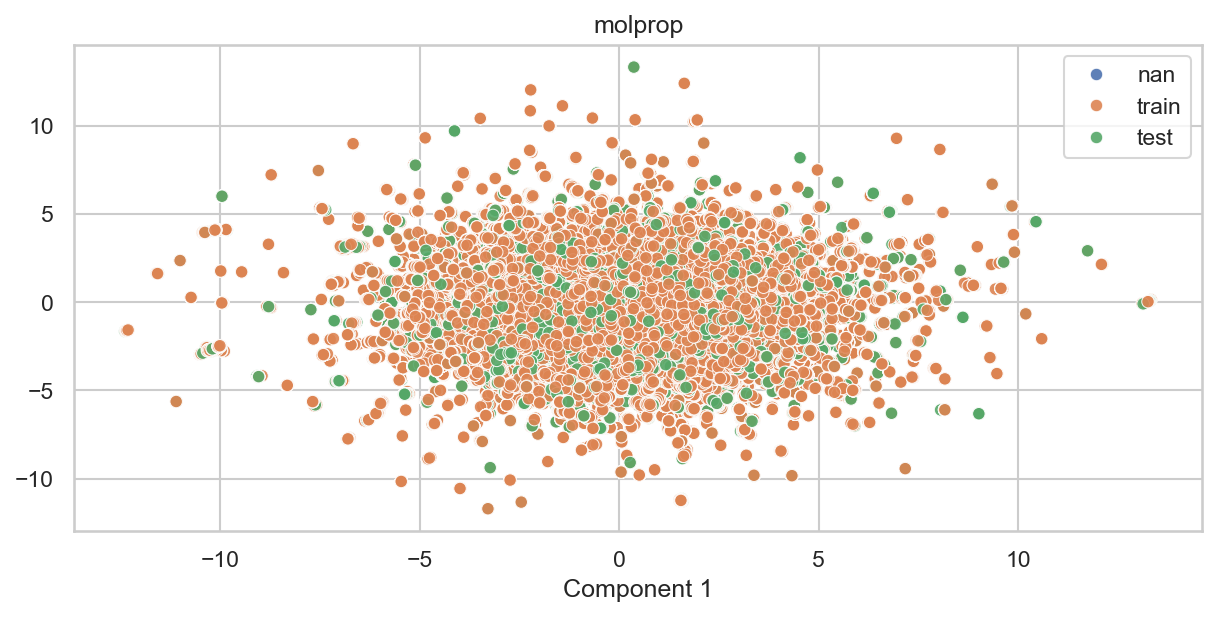

In [17]:
from utils.docs_utils import visualize_split_chemspace

fig = visualize_split_chemspace(mols=dataset.table[mol_col].to_list(), 
                                train_test_dict={"molprop": scaffold_split})

# export the figure to remote path
from utils.auroris_utils import save_image
save_image(fig, dm.fs.join(FIGURE_DIR, f"{split_key}_chemspace.png"))

## Create a Benchmark for MolProp250KLeadlike dataset
### Multitask for all properties with a shared scaffold split. 

In [18]:
benchmark_version = "v2"
benchmark_name = f"molprop-250k-reg-{benchmark_version}"

In [20]:
data_cols = ['mw', 'fsp3', 'n_rotatable_bonds', 'tpsa', 'clogp',
       'formal_charge', 'n_charged_atoms', 'refractivity', 'n_aromatic_rings']

In [22]:
from polaris.utils.types import TargetType

benchmark = MultiTaskBenchmarkSpecification(
    name=benchmark_name,
    dataset=dataset,
    target_cols=data_cols,
    targetTypes={col: TargetType.REGRESSION for col in data_cols},
    input_cols=mol_col,
    split=scaffold_split,
    main_metric="mean_squared_error",
    metrics=[
        "mean_absolute_error",
        "mean_squared_error",
        "r2",
        "spearmanr",
        "pearsonr",
        "explained_var",
    ],
    tags=["Representation", "Molecular Properties"],
    description="A multitask benchmark designed to predict nine molecular properties for 250,000 compounds sourced from ZINC15, with a focus on molecular representation.",
    owner=owner,
    readme=load_readme("org-Polaris/molprop/benchmarks/readme/01_molprop_250k_reg-readme.md"),
)

#### Save the benchmark

In [23]:
BENCHMARK_SAVE_DIR = f"{BENCHMARK_DIR}/{benchmark_name}"
path = benchmark.to_json(BENCHMARK_SAVE_DIR)

In [24]:
path

'gs://polaris-public/polaris-recipes/org-polaris/molprop/benchmarks/molprop-250k-reg-v2/benchmark.json'

In [ ]:
# Upload to hub
# benchmark_reg.upload_to_hub(owner=owner, access="private") 